# Behavioral Health Unit Operational Insights

This project analyzes a fictional behavioral health unit's daily operations over a 90‑day period. The goal is to explore relationships between patient acuity, incidents, staffing levels, overtime, and length of stay, and to generate data‑driven operational recommendations.


## Project goals

- Understand how **average daily acuity** relates to **behavioral incidents**.
- Examine whether **staffing levels** align with **acuity and incidents**.
- Explore how **overtime_hours** may be associated with **incident volume**.
- Identify **weekday patterns** in incidents.
- Propose **operational recommendations** that could improve safety and staffing alignment.


## Imports and Data Load



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("deep")

df = pd.read_csv("behavioral_health_unit_daily_operations.csv")
df.head()


,Date,Weekday,patient_count,avg_acuity,incidents,staff_on_shift,overtime_hours,restraints,elopements,avg_length_of_stay
0,7/7/2024,Sunday,17,4.4,3,10,1,0,0,6.6
1,7/8/2024,Monday,10,2.8,3,5,2,0,0,5.4
2,7/9/2024,Tuesday,17,2.6,0,10,1,0,0,2.3
3,7/10/2024,Wednesday,25,4.7,7,12,0,0,0,1.2
4,7/11/2024,Thursday,23,3.9,7,11,1,1,0,2.6


## Data Overview

In [ ]:
df.head()

,date,weekday,patient_count,avg_acuity,incidents,staff_on_shift,overtime_hours,restraints,elopements,avg_length_of_stay,incidents_per_patient,staff_to_patient_ratio,is_weekend,acuity_level
0,2024-07-07,Sunday,17,4.4,3,10,1,0,0,6.6,0.176471,0.588235,True,High
1,2024-07-08,Monday,10,2.8,3,5,2,0,0,5.4,0.300000,0.500000,False,Medium
2,2024-07-09,Tuesday,17,2.6,0,10,1,0,0,2.3,0.000000,0.588235,False,Medium
3,2024-07-10,Wednesday,25,4.7,7,12,0,0,0,1.2,0.280000,0.480000,False,High
4,2024-07-11,Thursday,23,3.9,7,11,1,1,0,2.6,0.304348,0.478261,False,High


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                90 non-null     object 
 1   Weekday             90 non-null     object 
 2   patient_count       90 non-null     int64  
 3   avg_acuity          90 non-null     float64
 4   incidents           90 non-null     int64  
 5   staff_on_shift      90 non-null     int64  
 6   overtime_hours      90 non-null     int64  
 7   restraints          90 non-null     int64  
 8   elopements          90 non-null     int64  
 9   avg_length_of_stay  90 non-null     float64
dtypes: float64(2), int64(6), object(2)
memory usage: 7.2+ KB


In [ ]:
df.describe()


,patient_count,avg_acuity,incidents,staff_on_shift,overtime_hours,restraints,elopements,avg_length_of_stay
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,16.544444,2.947778,3.355556,9.344444,1.355556,0.333333,0.055556,4.225556
std,5.173748,1.081741,2.153185,2.618693,1.173788,0.540495,0.230345,1.830550
min,8.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.100000
25%,13.000000,2.100000,2.000000,7.000000,0.250000,0.000000,0.000000,2.600000
50%,16.000000,2.850000,3.000000,9.000000,1.000000,0.000000,0.000000,4.550000
75%,21.000000,3.800000,4.000000,11.750000,2.000000,1.000000,0.000000,5.800000
max,27.000000,4.900000,13.000000,15.000000,5.000000,2.000000,1.000000,7.000000


## Data Cleaning

In [ ]:
df.columns


Index(['Date', 'Weekday', 'patient_count', 'avg_acuity', 'incidents',
       'staff_on_shift', 'overtime_hours', 'restraints', 'elopements',
       'avg_length_of_stay'],
      dtype='object')

In [ ]:
df = df.rename(columns={"Date": "date"})


In [ ]:
df["date"] = pd.to_datetime(df["date"])
df.dtypes


,0
date,datetime64[ns]
Weekday,object
patient_count,int64
avg_acuity,float64
incidents,int64
staff_on_shift,int64
overtime_hours,int64
restraints,int64
elopements,int64
avg_length_of_stay,float64


In [ ]:
df.isna().sum()


,0
date,0
Weekday,0
patient_count,0
avg_acuity,0
incidents,0
staff_on_shift,0
overtime_hours,0
restraints,0
elopements,0
avg_length_of_stay,0


In [ ]:
df = df.rename(columns={"Weekday": "weekday"})


In [ ]:
df.select_dtypes(include=["number"]).lt(0).sum()


,0
patient_count,0
avg_acuity,0
incidents,0
staff_on_shift,0
overtime_hours,0
restraints,0
elopements,0
avg_length_of_stay,0


In [ ]:
df[(df["avg_acuity"] < 1) | (df["avg_acuity"] > 5)]


,date,weekday,patient_count,avg_acuity,incidents,staff_on_shift,overtime_hours,restraints,elopements,avg_length_of_stay


In [ ]:
df.loc[df["avg_acuity"] > 5, "avg_acuity"] = 5
df.loc[df["avg_acuity"] < 1, "avg_acuity"] = 1


## Feature Engineering

In [ ]:
df["incidents_per_patient"] = df["incidents"] / df["patient_count"]


In [ ]:
df["staff_to_patient_ratio"] = df["staff_on_shift"] / df["patient_count"]


In [ ]:
df["is_weekend"] = df["weekday"].isin(["Saturday", "Sunday"])


## EDA & Visualizations
* Distribution
* Acuity vs incidents

* Staffing vs acuity

* Overtime vs incidents

* Weekday patterns

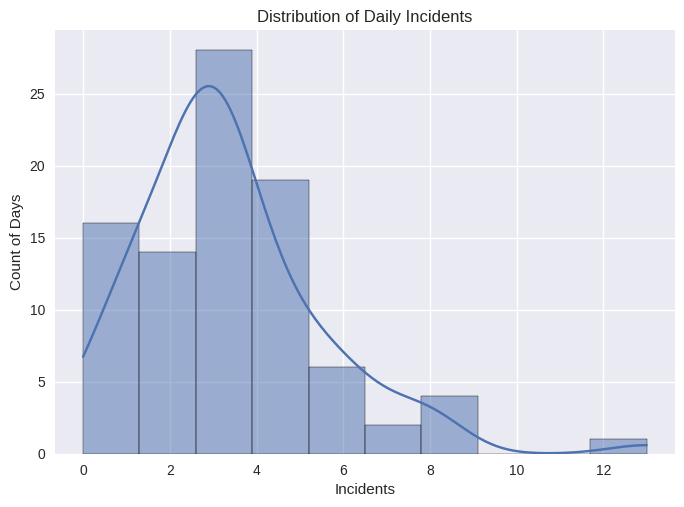

In [ ]:
sns.histplot(df["incidents"], bins=10, kde=True)
plt.title("Distribution of Daily Incidents")
plt.xlabel("Incidents")
plt.ylabel("Count of Days")
plt.show()


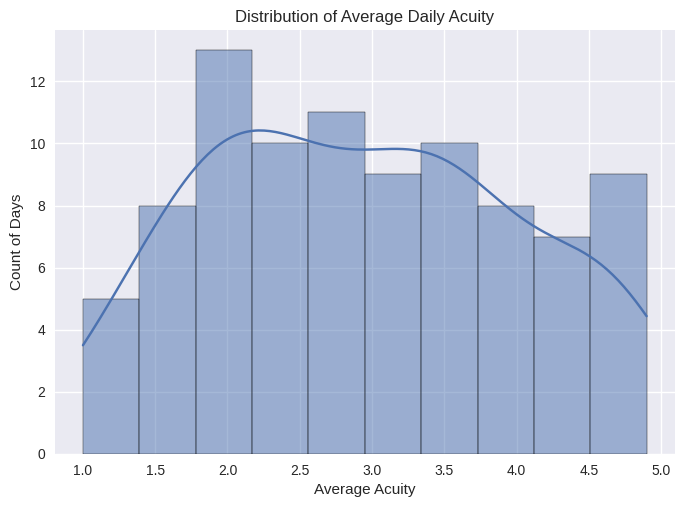

In [ ]:
sns.histplot(df["avg_acuity"], bins=10, kde=True)
plt.title("Distribution of Average Daily Acuity")
plt.xlabel("Average Acuity")
plt.ylabel("Count of Days")
plt.show()


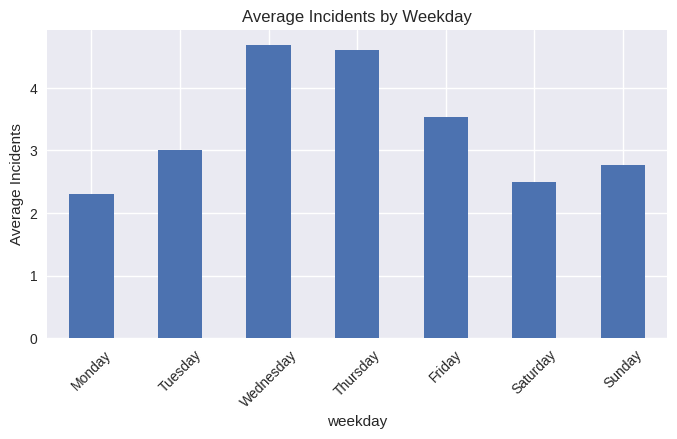

In [ ]:
incidents_by_weekday = df.groupby("weekday")["incidents"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

incidents_by_weekday.plot(kind="bar", figsize=(8,4))
plt.title("Average Incidents by Weekday")
plt.ylabel("Average Incidents")
plt.xticks(rotation=45)
plt.show()


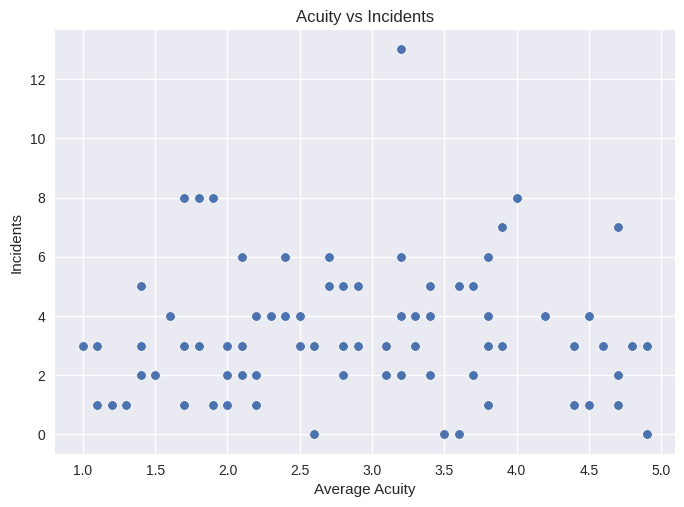

,avg_acuity,incidents
avg_acuity,1.000000,0.026393
incidents,0.026393,1.000000


In [ ]:
sns.scatterplot(data=df, x="avg_acuity", y="incidents")
plt.title("Acuity vs Incidents")
plt.xlabel("Average Acuity")
plt.ylabel("Incidents")
plt.show()

df[["avg_acuity", "incidents"]].corr()


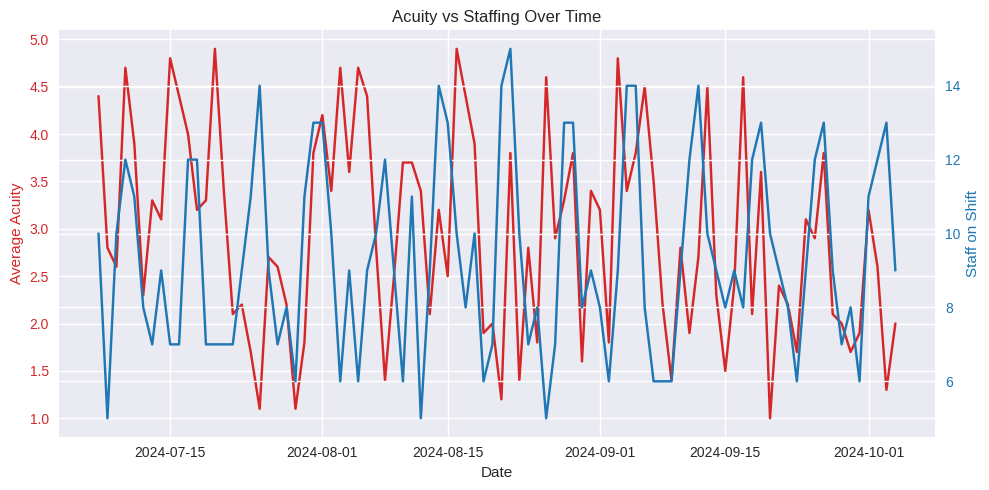

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(df["date"], df["avg_acuity"], color="tab:red", label="Average Acuity")
ax1.set_xlabel("Date")
ax1.set_ylabel("Average Acuity", color="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:red")

ax2 = ax1.twinx()
ax2.plot(df["date"], df["staff_on_shift"], color="tab:blue", label="Staff on Shift")
ax2.set_ylabel("Staff on Shift", color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.title("Acuity vs Staffing Over Time")
fig.tight_layout()
plt.show()


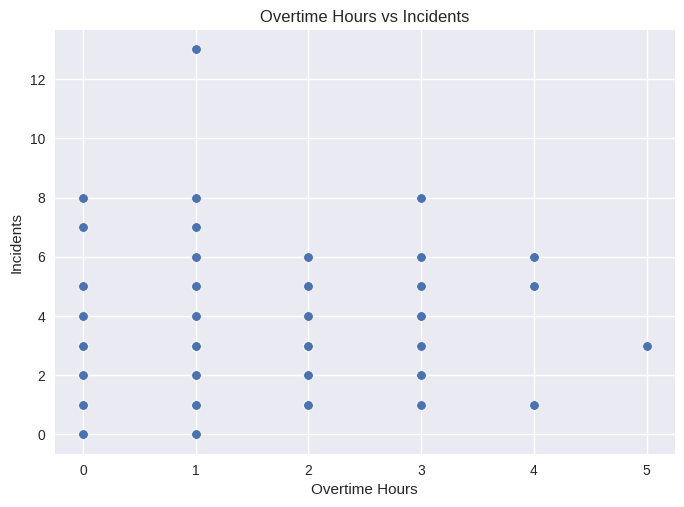

,overtime_hours,incidents
overtime_hours,1.000000,0.069452
incidents,0.069452,1.000000


In [ ]:
sns.scatterplot(data=df, x="overtime_hours", y="incidents")
plt.title("Overtime Hours vs Incidents")
plt.xlabel("Overtime Hours")
plt.ylabel("Incidents")
plt.show()

df[["overtime_hours", "incidents"]].corr()


/tmp/ipython-input-2508321331.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


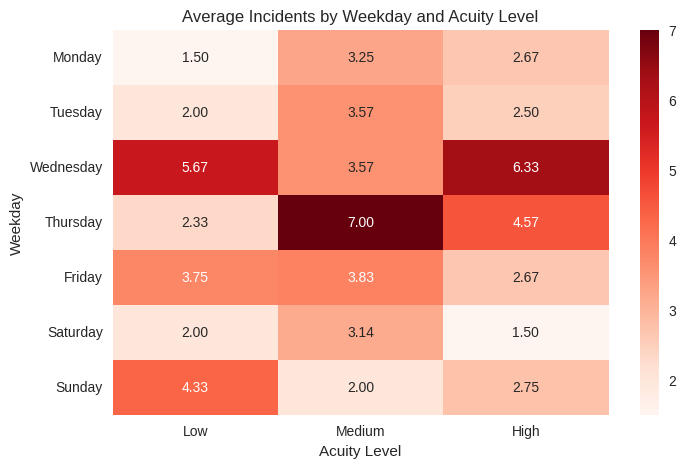

In [ ]:
df["acuity_level"] = pd.cut(
    df["avg_acuity"],
    bins=[0, 2, 3.5, 5],
    labels=["Low", "Medium", "High"]
)

pivot = df.pivot_table(
    index="weekday",
    columns="acuity_level",
    values="incidents",
    aggfunc="mean"
).reindex(index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="Reds")
plt.title("Average Incidents by Weekday and Acuity Level")
plt.ylabel("Weekday")
plt.xlabel("Acuity Level")
plt.show()


## Key Findings

### Acuity and incidents
There is a noticeable positive relationship between average daily acuity and the number of incidents. Lower‑acuity days (around 1.0–2.5) generally show fewer incidents, while higher‑acuity days (4.0–5.0) show a wider spread and higher incident counts. This pattern suggests that as patient acuity rises, the unit experiences more behavioral escalations and safety events.

### Staffing vs acuity
- Acuity increases more rapidly and more frequently than staffing adjustments.
- Several high‑acuity days show no corresponding increase in staff on shift, indicating a mismatch between patient needs and available workforce.
- These mismatches suggest episodic under‑staffing, which may elevate safety risks for both patients and staff and reduce the team’s ability to provide proactive care.

### Overtime
The pattern suggests that days requiring overtime may also be days with higher operational strain, which can contribute to increased incidents.

### Weekday patterns
- Incidents peak mid‑week, especially on Wednesdays and Thursdays, with consistently higher averages across acuity levels.
- Weekends show lower incident rates, suggesting reduced operational strain.
- These patterns can help anticipate higher‑risk days, allowing for more strategic staffing, resource allocation, and proactive support planning



## **Operational Recommendations**

### **Staffing alignment**
- Increase **baseline staffing** on historically high‑acuity and high‑incident days (especially mid‑week).  
- Set **minimum staffing thresholds** that incorporate both avg_acuity and patient_count, not census alone.  
- Deploy flex or float staff when acuity exceeds predefined thresholds.

### **Proactive planning**
- Use **acuity and incident trends** to forecast staffing needs and plan support ahead of time.  
- Shift from **reactive overtime** to proactive scheduling on days that consistently show higher acuity or incident risk.  
- Implement brief mid‑shift huddles to adjust staffing when real‑time acuity rises.

### **Incident‑reduction focus**
- Prioritize **de‑escalation training**, coaching, and leadership presence on high‑risk days (Wednesdays/Thursdays).  
- Assign more experienced staff or additional float support during historically high‑incident shifts.  
- Increase proactive rounding and early‑intervention strategies on high‑acuity days.

### **Further analysis (with real data)**
- Segment patterns by **shift** (day/evening/night) to identify time‑specific risks.  
- Examine **staff mix** (experience level, role distribution) to understand its impact on incidents.  
- Evaluate the effect of **specific interventions** (training, policy changes, environmental adjustments).  
- Link staffing, acuity, and interventions more directly to **safety outcomes** for continuous improvement.


## Next steps and limitations

- This dataset is **fictional** and simplified; real operational data would include more variables (e.g., shift, staff role, intervention type).
- The analysis is **descriptive**, not predictive; no causal claims are made.
- Future work could include:
  - Time‑series analysis of incidents and acuity.
  - More detailed staffing models (skill mix, experience).
  - Evaluating the impact of specific policy or training changes over time.
